In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r"C:\Users\João Varella\OneDrive\Área de Trabalho\Programação\Treina Recife - Análise de dados\aluguel.csv", sep=';')

In [6]:
df.shape

(32960, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [8]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [9]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [10]:
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [11]:
display(df.describe())

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [12]:
df['Bairro'].describe()

count               32960
unique                162
top       Barra da Tijuca
freq                 6259
Name: Bairro, dtype: object

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21152 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21152 non-null  object 
 1   Bairro      21152 non-null  object 
 2   Quartos     21152 non-null  int64  
 3   Vagas       21152 non-null  int64  
 4   Suites      21152 non-null  int64  
 5   Area        21152 non-null  int64  
 6   Valor       21152 non-null  float64
 7   Condominio  21152 non-null  float64
 8   IPTU        21152 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [17]:
df.corr(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Quartos,1.000000,-0.001333,0.690588,0.066248,-0.041800,-0.013126,0.023162
Vagas,-0.001333,1.000000,0.012832,0.070809,0.072300,0.010369,0.031074
Suites,0.690588,0.012832,1.000000,0.161325,0.041320,0.000310,0.108384
Area,0.066248,0.070809,0.161325,1.000000,0.619615,0.081005,0.249052
Valor,-0.041800,0.072300,0.041320,0.619615,1.000000,0.083373,0.250513
Condominio,-0.013126,0.010369,0.000310,0.081005,0.083373,1.000000,0.034809
IPTU,0.023162,0.031074,0.108384,0.249052,0.250513,0.034809,1.000000


In [18]:
df = df[['Area','Valor']]

In [20]:
df.corr()

,Area,Valor
Area,1.000000,0.619615
Valor,0.619615,1.000000


In [21]:
x = np.array(df['Area'])

In [22]:
x = x.reshape(-1,  1)

In [23]:
y = df['Valor']

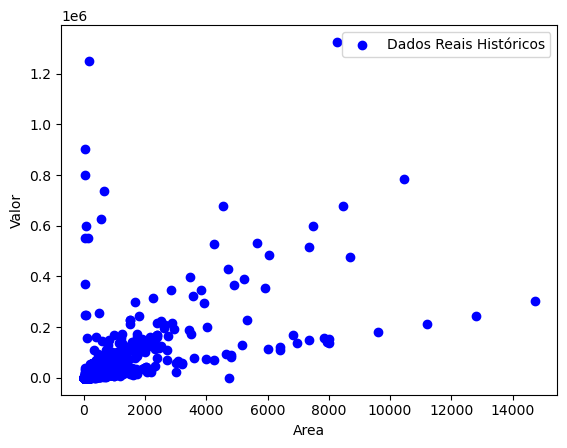

In [25]:
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Area")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [28]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [31]:
modelo = LinearRegression()

In [35]:
modelo.fit(x_treino, y_treino)

LinearRegression()

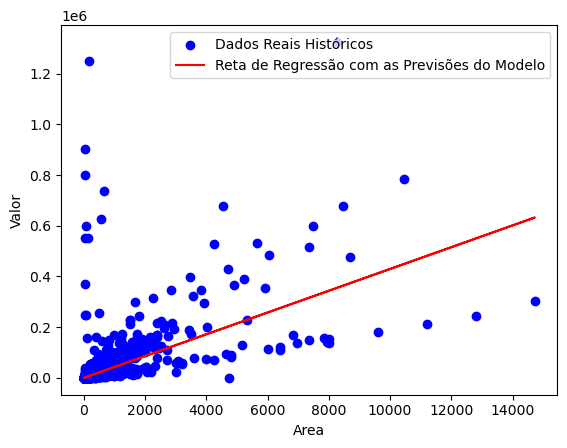

In [36]:
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(x, modelo.predict(x), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Area")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [38]:
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.47


In [41]:
print(format(modelo.intercept_,".2f"))

324.27


In [40]:
modelo.coef_

array([42.9209434])

In [60]:
areas = [165.5, 300, 9, 23, 900, 90]
for area in areas:
    print(f'{area} : {modelo.coef_ * area + modelo.intercept_}')

165.5 : [7427.68403039]
300 : [13200.55091762]
9 : [710.55638837]
23 : [1311.44959596]
900 : [38953.11695731]
90 : [4187.15280372]
